In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

## Visualizaciones

1. Exploracion - subplots de distintos filtrados
2. Gráfica de los actividades de un analista de datos/business analyst
3. Gráfica de los top 20 herramientas usadas por los DA/BA
4. Grafica del lenguajes recommendados como primer lenguaje de programacion
5. Grafica de herramientas usadas por seniors vs juniors
6. Grafica de herramientas usadas por continente
7. Grafica de herramientas usadas en Europa
8. Graficas de herramientas BI en el mundo y en Europa

In [2]:
pd.options.display.max_columns=None
# plt.rcParams.update({'font.size': 22})

In [3]:
# cargamos el dataframe y filtramos por Business Analyst y Data Analyst en la columna job title

df_todo = pd.read_csv('../datos/datos_divididos_unos.csv', index_col = 0)
df = df_todo[(df_todo["job_title"] == "Business Analyst") | (df_todo["job_title"] == "Data Analyst")]

In [4]:
def creacion_subplots(df, lista_prefijos):
    '''
    Acepta un dataframe y una lista de prefijos de columnas y muestra un subplot por cada elemento de la lista. 
    Las ejes y están compuesta de las columnas del dataframe que llevan el prefijo, y las ejes x son el número de usuarios de la
    herramienta correspondente.
    
    Parametros:
    - dataframe: con datos numericos para sumar
    - lista de strings: cada string es un prefijo de una serie de columnas
    
    Returns:
    - none
    '''
    
    diccionario =  {}
    
    # creamos una lista de las columnas que lleva cada prefijo
    for i in lista_prefijos:
        lista_col = []
        for col in df.columns:
            if i in col:
                lista_col.append(col)

        # creamos un dataframe de las columnas numericas de cada prefijo y lo guardamos en un diccionario
        dataframe_tool = df.loc[:, lista_col[0]: lista_col[-1]].sum(numeric_only=True).reset_index()
        dataframe_tool.columns = [f"{i}", 'number_of_users']
        diccionario[i] = dataframe_tool
    
    # creamos una a serie de subplots, uno por cada dataframe que corresponde a un prefijo/una herramienta   
    fig, axes = plt.subplots(4, 2, figsize=(20, 15))
    axes = axes.flatten()
    for n, (key, dataframe) in enumerate(diccionario.items()):
            fig = sns.barplot(y=key, x= 'number_of_users', data=dataframe, order= dataframe.sort_values('number_of_users', ascending= False)[key], ax=axes[n])

            fig.set_title(f'Número de usuarios por {key}') 

            fig.spines[["top", "right"]].set_visible(False)

            fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500])

    plt.tight_layout()

    plt.show()

In [5]:
# definimos la lista de prefijos

lista_prefijos = ['IDE_', 'visualisation_', 'big_data_', 'BI_tools_', 'activities_', 'dev_language_',  'notebooks_', 'sharing_']

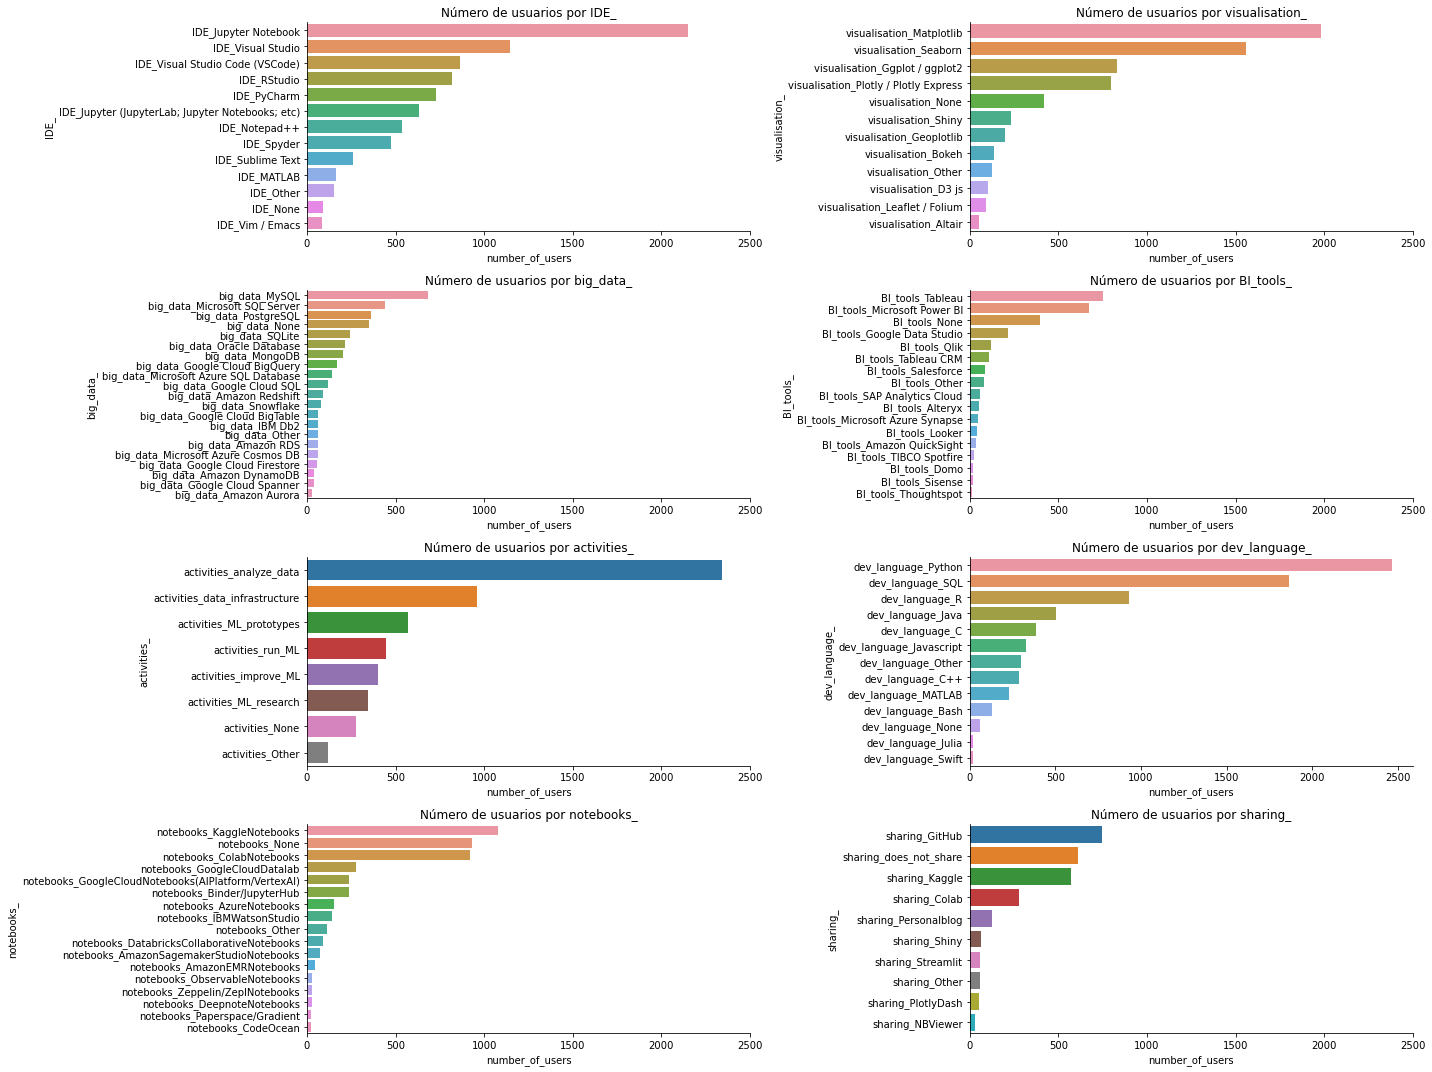

In [6]:
# creamos los subplots con la función

creacion_subplots(df, lista_prefijos)

In [7]:
def creacion_graficas(df, lista_prefijos):
    '''
    Acepta un dataframe y una lista de prefijos de columnas y muestra una grafica por elemento de la lista. 
    La eje y está compuesta de las columnas del dataframe que llevan el prefijo, y la eje x es el número de usuarios de la
    herramienta correspondente.
    
    Parametros:
    - dataframe: con datos numericos para sumar
    - lista de strings: cada string es un prefijo de una serie de columnas
    
    Returns:
    - none
    '''
    diccionario =  {}
    for i in lista_prefijos:
        lista_col = []
        for col in df.columns:
            if i in col:
                lista_col.append(col)

        dataframe = df.loc[:, lista_col[0]: lista_col[-1]].sum(numeric_only=True).reset_index()
        dataframe.columns = [f"{i}", 'number_of_users']
        diccionario[i] = dataframe
        
        plt.figure(figsize=(20, 10))

        fig=sns.barplot(y=i, x= 'number_of_users', data=diccionario[i], order= diccionario[i].sort_values('number_of_users', ascending= False)[i])

        fig.set_title(f'Number of users per {i} tool') 

        fig.spines[["top", "right"]].set_visible(False)

        fig.set_xticks(ticks = [0, 500, 1000, 1500, 2000, 2500])

        plt.tight_layout()

        plt.show()
           
    

In [8]:
#creacion_graficas(df, lista_prefijos)

## Gráfica de los actividades de un analista de datos/business analyst

In [9]:
# calculamos el numero total de respuestas de la pregunta sobre actividades de trabajo

total_activities = df.shape[0] - df['work_activities'].isnull().sum()
total_activities

2971

In [10]:
# creamos un dataframe de las columnas de la pregunta de la encuesta sobre las activades/tareas de trabajo

df_work_acts = df.loc[:, 'activities_ML_research' : 'activities_run_ML'].sum().reset_index()
df_work_acts.columns = ['Actividades de trabajo', 'Número de usuarios']
df_work_acts = df_work_acts.sort_values(by='Número de usuarios', ascending=False)
df_work_acts['Porcentaje'] = df_work_acts['Número de usuarios'] / total_activities * 100

In [11]:
df_work_acts

,Actividades de trabajo,Número de usuarios,Porcentaje
5,activities_analyze_data,2343.0,78.862336
4,activities_ML_prototypes,571.0,19.219118
6,activities_run_ML,446.0,15.011781
3,activities_improve_ML,398.0,13.396163
0,activities_ML_research,344.0,11.578593
1,activities_None,274.0,9.222484
2,activities_Other,121.0,4.072703


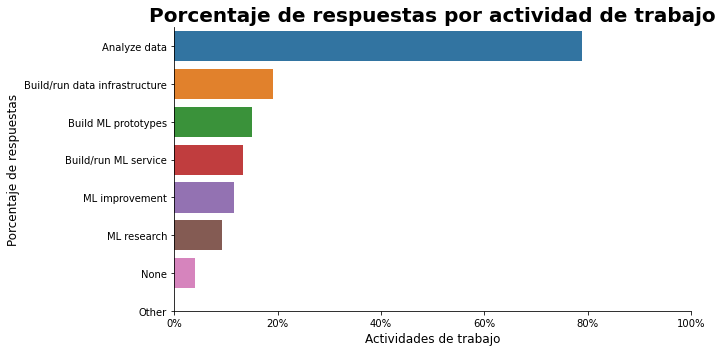

In [12]:
# creamos un barplot de los porcentajes de respuestas de cada actividad

plt.figure(figsize=(10, 5))

fig = sns.barplot(y = 'Actividades de trabajo', x = 'Porcentaje', data = df_work_acts, order = df_work_acts.sort_values('Porcentaje', ascending= False)['Actividades de trabajo'])

fig.set_title('Porcentaje de respuestas por actividad de trabajo', fontsize = 20, fontweight ='bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Actividades de trabajo", fontsize = 12)
fig.set_ylabel (ylabel = "Porcentaje de respuestas", fontsize = 12)

fig.set(xticks = [0, 20, 40, 60, 80, 100])
fig.set(yticks = [0, 1, 2, 3, 4, 5, 6, 7])
fig.set(xticklabels = ['0%', '20%', '40%', '60%', '80%', '100%'])
fig.set(yticklabels = ["Analyze data", "Build/run data infrastructure", "Build ML prototypes", "Build/run ML service", "ML improvement", "ML research", "None", "Other"])

plt.tight_layout()

plt.show()

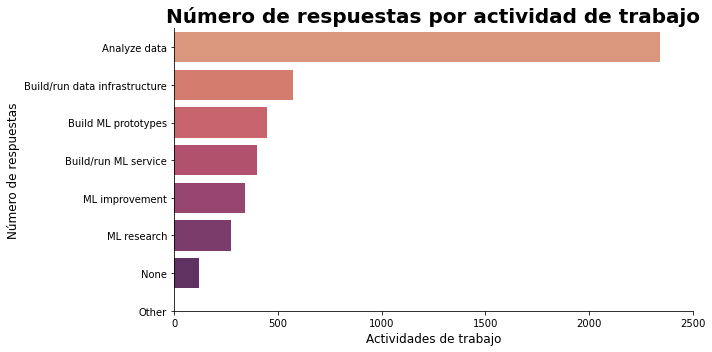

In [13]:
# creamos un barplot del número de respuestas de cada actividad

plt.figure(figsize=(10, 5))

fig=sns.barplot(y='Actividades de trabajo', x= 'Número de usuarios', data=df_work_acts, order= df_work_acts.sort_values('Número de usuarios', ascending= False)['Actividades de trabajo'], palette='flare')

fig.set_title('Número de respuestas por actividad de trabajo', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Actividades de trabajo", fontsize = 12)
fig.set_ylabel (ylabel = "Número de respuestas", fontsize = 12)

fig.set(xticks = [0, 500, 1000, 1500, 2000, 2500])
fig.set(yticks = [0, 1, 2, 3, 4, 5, 6, 7])
fig.set(xticklabels = [0, 500, 1000, 1500, 2000, 2500])
fig.set(yticklabels = ["Analyze data", "Build/run data infrastructure", "Build ML prototypes", "Build/run ML service", "ML improvement", "ML research", "None", "Other"])

plt.tight_layout()

plt.show()

ValueError: 'label' must be of length 'x'

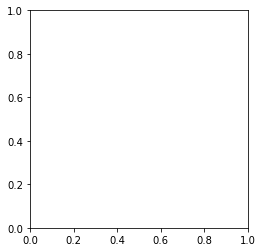

In [14]:
# creamos un pieplot de los porcentajes de respuesta por actividad

plt.figure()
plt.pie(df_work_acts['Porcentaje'], 
        labels = ["Analyze data", "Build/run data infrastructure", "Build ML prototypes", "Build/run ML service", "ML improvement", "ML research", "None", "Other"], 
        radius = 2, 
        colors = ['#2b4b82', '#627dc2', '#f0abc1', '#f2a490', '#f0abc1','#f2a490','#94ddde', '#6BA8A8'])
plt.show()

## Gráfica de los top 20 herramientas usadas por los DA/BA

In [15]:
# eliminamos las columnas de las actividades de trabajo para que las columnas numericas
# sean solo de las herramientas

df_tools = df.drop(columns = ['activities_data_infrastructure', 
                            'activities_ML_prototypes', 
                            'activities_ML_research', 
                            'activities_Other', 
                            'activities_improve_ML', 
                            'activities_analyze_data', 
                            'activities_run_ML', 
                            'activities_None',], axis = 1)

In [16]:
df_sum_tools = df_tools.select_dtypes(include=np.number).sum().reset_index()
df_sum_tools.columns = ['Herramienta', 'Número de usuarios']
df_sum_tools = df_sum_tools.sort_values(by='Número de usuarios', ascending=False).head(20)

In [17]:
# guardamos una lista de las primeras 15 herramientas

top_15 = ['dev_language_Python',
        'IDE_Jupyter Notebook',
        'visualisation_Matplotlib',
        'dev_language_SQL',
        'visualisation_Seaborn',
        'IDE_Visual Studio',
        'notebooks_KaggleNotebooks',
        'notebooks_None',
        'dev_language_R',
        'notebooks_ColabNotebooks',
        'IDE_Visual Studio Code (VSCode)',
        'visualisation_Ggplot / ggplot2',
        'IDE_RStudio',
        'visualisation_Plotly / Plotly Express',
        'BI_tools_Tableau']

In [ ]:
# guardamos una lista de las primeras 20 herramientas

top_20 = df_sum_tools['Herramienta'].to_list()

In [ ]:
# calculamos el numero total de respuestas por herramienta
df.shape[0] - df_tools.iloc[:,12:19].isnull().sum()

dev_language     2994
IDE              2991
big_data         1712
BI_tools         1701
visualisation    2924
notebooks        2983
sharing          1659
dtype: int64

In [18]:
# creamos una mapa de los totales de cada categoria por columna

diccionario_tools_totals = {'dev_language_Python': 2994,
                    'IDE_Jupyter Notebook': 2991,
                    'visualisation_Matplotlib': 2924,
                    'dev_language_SQL': 2994,
                    'visualisation_Seaborn': 2924,
                    'IDE_Visual Studio': 2991,
                    'notebooks_KaggleNotebooks': 2983,
                    'notebooks_None': 2983,
                    'dev_language_R': 2994,
                    'notebooks_ColabNotebooks': 2983,
                    'IDE_Visual Studio Code (VSCode)': 2991,
                    'visualisation_Ggplot / ggplot2': 2924,
                    'IDE_RStudio': 2991,
                    'visualisation_Plotly / Plotly Express': 2924,
                    'BI_tools_Tableau': 1701,
                    'sharing_GitHub': 1659,
                    'IDE_PyCharm': 2991,
                    'big_data_MySQL': 1712,
                    'BI_tools_Microsoft Power BI': 1701,
                    'IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc)': 2991}

In [19]:
# añadimos columnas de los totales por categoria y del porcentaje por categoria

df_sum_tools['Total de respuestas'] = df_sum_tools['Herramienta'].map(diccionario_tools_totals)
df_sum_tools['Porcentaje'] = round((df_sum_tools['Número de usuarios'] / df_sum_tools['Total de respuestas'] * 100), 0)
df_sum_tools

,Herramienta,Número de usuarios,Total de respuestas,Porcentaje
36,dev_language_Python,2465.0,2994,82.0
45,IDE_Jupyter Notebook,2149.0,2991,72.0
54,visualisation_Matplotlib,1984.0,2924,68.0
28,dev_language_SQL,1866.0,2994,62.0
58,visualisation_Seaborn,1559.0,2924,53.0
48,IDE_Visual Studio,1144.0,2991,38.0
0,notebooks_KaggleNotebooks,1077.0,2983,36.0
15,notebooks_None,933.0,2983,31.0
31,dev_language_R,928.0,2994,31.0
1,notebooks_ColabNotebooks,920.0,2983,31.0


In [20]:
# creamos un mapa de los nombres de herramientas

diccionario_tools = {'dev_language_Python': 'Python',
                    'IDE_Jupyter Notebook': 'Jupyter Notebook',
                    'visualisation_Matplotlib':'Matplotlib',
                    'dev_language_SQL':'SQL',
                    'visualisation_Seaborn':'Seaborn',
                    'IDE_Visual Studio':'Visual Studio',
                    'notebooks_KaggleNotebooks':'Kaggle Notebooks',
                    'notebooks_None':'Does not use notebooks',
                    'dev_language_R':'R',
                    'notebooks_ColabNotebooks':'ColabNotebooks',
                    'IDE_Visual Studio Code (VSCode)':'VSCode',
                    'visualisation_Ggplot / ggplot2':'Ggplot / ggplot2',
                    'IDE_RStudio':'RStudio',
                    'visualisation_Plotly / Plotly Express':'Plotly / Plotly Express',
                    'BI_tools_Tableau':'Tableau',
                    'sharing_GitHub':'GitHub',
                    'IDE_PyCharm':'PyCharm',
                    'big_data_MySQL':'MySQL',
                    'BI_tools_Microsoft Power BI':'Power BI',
                    'IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc)': 'IDE Jupyter',
                    'IDE_Visual Studio Code (VSCode)': 'VSCode',
                    'IDE_Notepad++': 'Notepad++',
                    'sharing_does_not_share': 'Does not share'}

In [21]:
# reemplazamos los nombres de las columnas por las nombres de las herramientas

df_sum_tools['Herramienta'] = df_sum_tools['Herramienta'].map(diccionario_tools)
df_sum_tools

,Herramienta,Número de usuarios,Total de respuestas,Porcentaje
36,Python,2465.0,2994,82.0
45,Jupyter Notebook,2149.0,2991,72.0
54,Matplotlib,1984.0,2924,68.0
28,SQL,1866.0,2994,62.0
58,Seaborn,1559.0,2924,53.0
48,Visual Studio,1144.0,2991,38.0
0,Kaggle Notebooks,1077.0,2983,36.0
15,Does not use notebooks,933.0,2983,31.0
31,R,928.0,2994,31.0
1,ColabNotebooks,920.0,2983,31.0


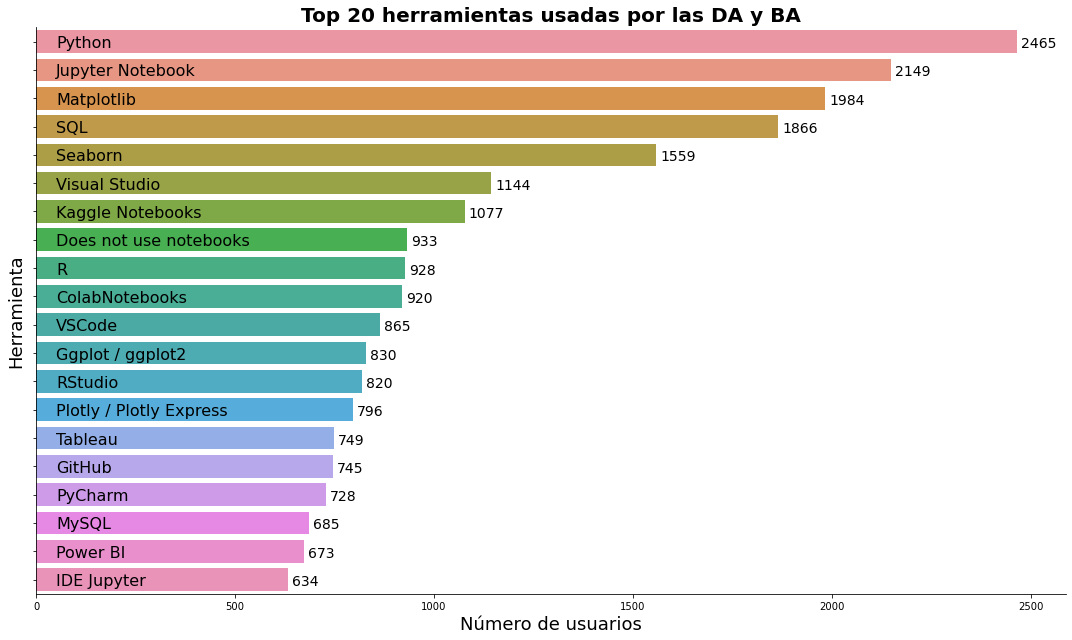

In [23]:
# creamos un barplot de los top 20 herramientas más usadas

plt.figure(figsize=(15, 9))

fig=sns.barplot(y = 'Herramienta', x = 'Número de usuarios', data=df_sum_tools, order= df_sum_tools.sort_values('Número de usuarios', ascending= False)['Herramienta'])

fig.set_title('Top 20 herramientas usadas por las DA y BA', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_sum_tools["Herramienta"]):
    plt.text(50, indice+0.2, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 16) 

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_sum_tools["Número de usuarios"]):
    plt.text(valor+10, indice+0.2, int(valor),
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 14) 

fig.set_xlabel (xlabel = "Número de usuarios", fontsize = 18)
fig.set_ylabel (ylabel = "Herramienta", fontsize = 18)

fig.set(xticks = [0, 500, 1000, 1500, 2000, 2500])
#fig.set(yticks = [0, 1, 2, 3, 4, 5, 6, 7])
fig.set(xticklabels = [0, 500, 1000, 1500, 2000, 2500])
fig.set(yticklabels = ["", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", ""])


plt.tight_layout()

plt.show()

## Grafica del lenguajes recommendados como primer lenguaje de programacion

In [24]:
# creamos una tabla de sidetable de la columna de primera lenguaje de 
# programación recomendada para principiantes

df_rec_language = df.stb.freq(['first_language_rec'], thresh= 95)
df_rec_language['percent'] = round(df_rec_language['percent'], 0)
df_rec_language 

,first_language_rec,count,percent,cumulative_count,cumulative_percent
0,Python,2195,73.0,2195,73.337788
1,SQL,349,12.0,2544,84.998329
2,R,263,9.0,2807,93.785499
3,others,186,6.0,2993,100.000000


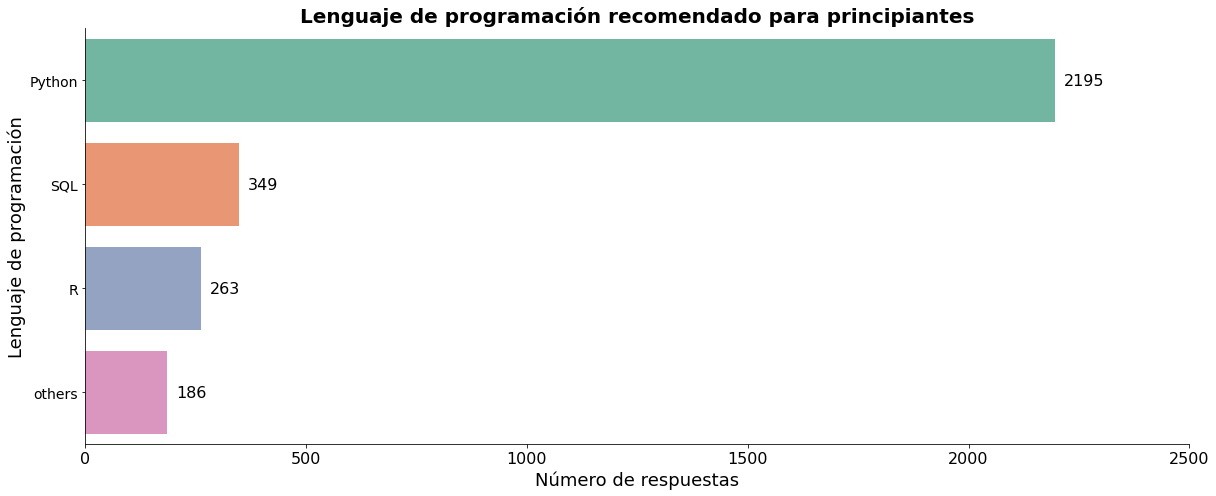

In [ ]:
# creamos un barplot de las cuentas de las respuestas

plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'first_language_rec', x= "count", data=df_rec_language, palette='Set2')

fig.set_title('Lenguaje de programación recomendado para principiantes', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Número de respuestas", fontsize = 18)
fig.set_ylabel (ylabel = "Lenguaje de programación", fontsize = 18)

fig.set(xticks = [0, 500, 1000, 1500, 2000, 2500])
#fig.set(yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8])
fig.set_xticklabels(labels = [0, 500, 1000, 1500, 2000, 2500], size=16)
fig.set_yticklabels(labels = fig.get_yticklabels(), size=14)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_rec_language["count"]):
    plt.text(valor+20, indice+0.05, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 16) 

plt.tight_layout()

plt.show()

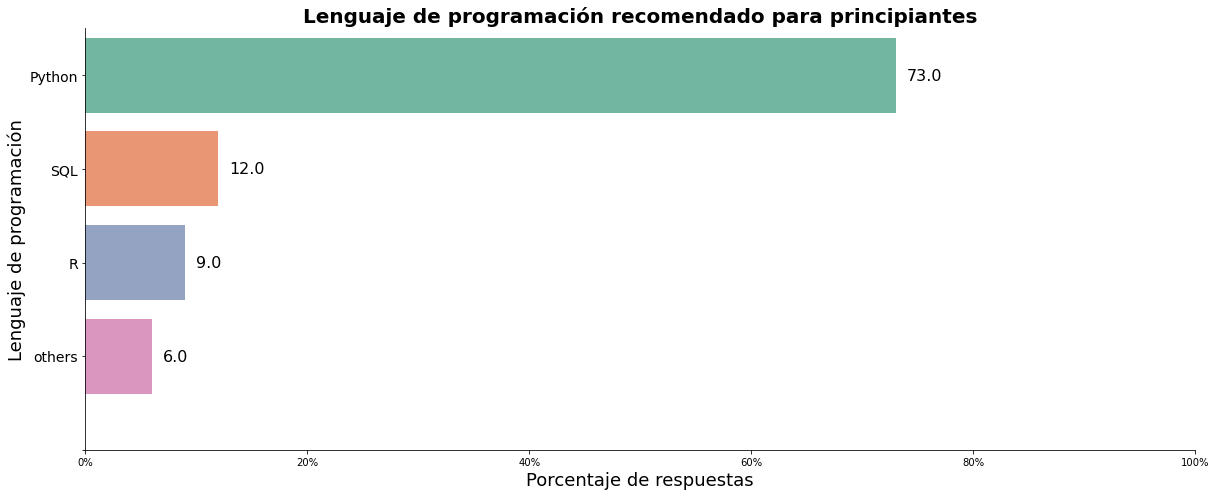

In [ ]:
# creamos un barplot de las porcentajes de las respuestas

plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'first_language_rec', x= "percent", data=df_rec_language, palette='Set2')

fig.set_title('Lenguaje de programación recomendado para principiantes', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Porcentaje de respuestas", fontsize = 18)
fig.set_ylabel (ylabel = "Lenguaje de programación", fontsize = 18)

fig.set(xticks = [0, 20, 40, 60, 80, 100])
fig.set(yticks = [0, 1, 2, 3, 4])
fig.set(xticklabels = ['0%', '20%', '40%', '60%', '80%', '100%'])
fig.set_yticklabels(labels = fig.get_yticklabels(), size=14)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_rec_language["percent"]):
    plt.text(valor+1, indice+0.05, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 16) 

plt.tight_layout()

plt.show()

## Grafica de herramientas usadas por seniors vs juniors

In [ ]:
# creamos un dataframe de los top 15 herramientas y traemos la columna de años 
# de experiencia de programación

df_perfiles = df.filter(items = top_15, axis = 1)
df_perfiles['programming_experience'] = df['programming_experience']
df_perfiles.head(2)

,dev_language_Python,IDE_Jupyter Notebook,visualisation_Matplotlib,dev_language_SQL,visualisation_Seaborn,IDE_Visual Studio,notebooks_KaggleNotebooks,notebooks_None,dev_language_R,notebooks_ColabNotebooks,IDE_Visual Studio Code (VSCode),visualisation_Ggplot / ggplot2,IDE_RStudio,visualisation_Plotly / Plotly Express,BI_tools_Tableau,programming_experience
16,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,Senior
32,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,0.0,1.0,1.0,0.0,NaN,Junior


In [ ]:
# creamos un dataframe de los usuarios 'senior'

df_senior = df_perfiles[df_perfiles['programming_experience'] == 'Senior']
df_sum_senior = df_senior.select_dtypes(include=np.number).sum().reset_index()
df_sum_senior.columns = ['Herramienta', 'Número de usuarios']
df_sum_senior = df_sum_senior.sort_values(by='Número de usuarios', ascending=False)
df_sum_senior['Perfil'] = 'Senior'
df_sum_senior['Porcentaje'] = round((df_sum_senior['Número de usuarios'] / 1113 * 100), 0)
df_sum_senior

,Herramienta,Número de usuarios,Perfil,Porcentaje
0,dev_language_Python,884.0,Senior,79.0
1,IDE_Jupyter Notebook,794.0,Senior,71.0
3,dev_language_SQL,791.0,Senior,71.0
2,visualisation_Matplotlib,731.0,Senior,66.0
4,visualisation_Seaborn,586.0,Senior,53.0
5,IDE_Visual Studio,454.0,Senior,41.0
6,notebooks_KaggleNotebooks,399.0,Senior,36.0
8,dev_language_R,392.0,Senior,35.0
7,notebooks_None,383.0,Senior,34.0
11,visualisation_Ggplot / ggplot2,364.0,Senior,33.0


In [ ]:
# creamos un dataframe de los usuarios 'junior'

df_junior = df_perfiles[df_perfiles['programming_experience'] == 'Junior']
df_sum_junior = df_junior.select_dtypes(include=np.number).sum().reset_index()
df_sum_junior.columns = ['Herramienta', 'Número de usuarios']
df_sum_junior = df_sum_junior.sort_values(by='Número de usuarios', ascending=False)
df_sum_junior['Perfil'] = 'Junior'
df_sum_junior['Porcentaje'] = round((df_sum_junior['Número de usuarios'] / 1881 * 100), 0)
df_sum_junior

,Herramienta,Número de usuarios,Perfil,Porcentaje
0,dev_language_Python,1581.0,Junior,84.0
1,IDE_Jupyter Notebook,1355.0,Junior,72.0
2,visualisation_Matplotlib,1253.0,Junior,67.0
3,dev_language_SQL,1075.0,Junior,57.0
4,visualisation_Seaborn,973.0,Junior,52.0
5,IDE_Visual Studio,690.0,Junior,37.0
6,notebooks_KaggleNotebooks,678.0,Junior,36.0
9,notebooks_ColabNotebooks,584.0,Junior,31.0
7,notebooks_None,550.0,Junior,29.0
8,dev_language_R,536.0,Junior,28.0


In [ ]:
# juntamos los dos dataframe y cambiamos los nombres de las herramientas segun el mapa

df_sum_perfil = pd.concat([df_sum_junior, df_sum_senior], axis=0).sort_values(by='Número de usuarios', ascending=False)

df_sum_perfil['Herramienta'] = df_sum_perfil['Herramienta'].map(diccionario_tools)

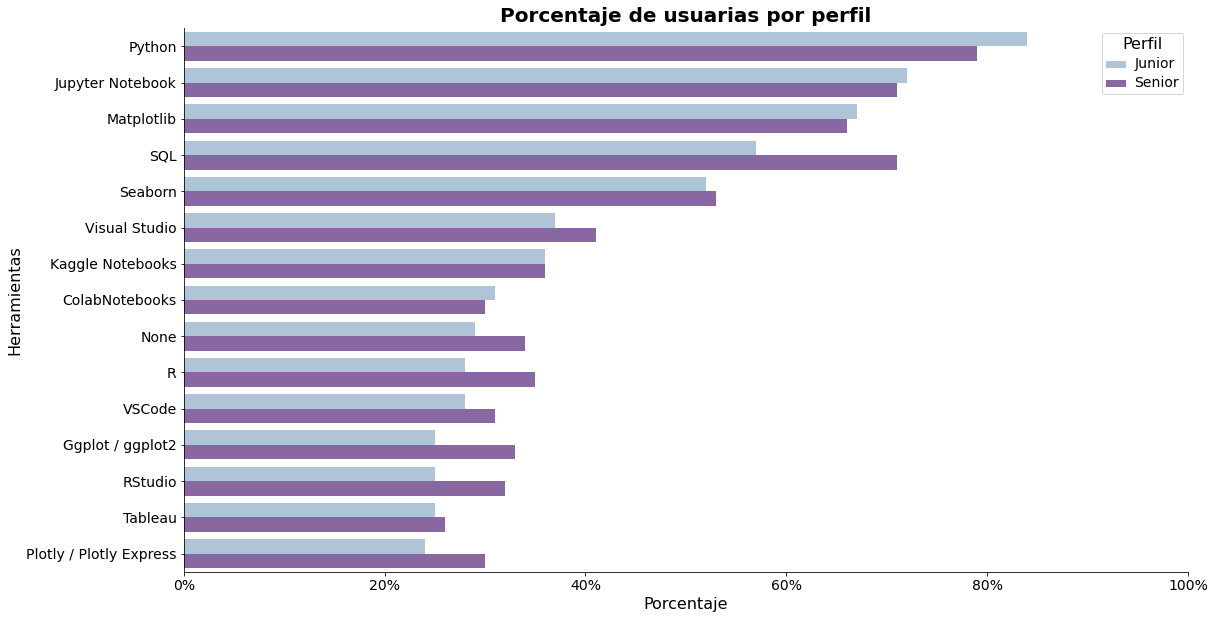

In [ ]:
# creamos una gráfica comparando las herramientas usadas por los perfiles junior y senior

plt.figure(figsize =(18,10))

fig = sns.barplot(x='Porcentaje', y = 'Herramienta', hue = "Perfil", data = df_sum_perfil, palette='BuPu')

fig.set_title('Porcentaje de usuarias por perfil', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Porcentaje", fontsize = 16)
fig.set_ylabel (ylabel = "Herramientas", fontsize = 16)

fig.set(xticks = [0, 20, 40, 60, 80, 100])
fig.set_xticklabels(labels = ['0%', '20%', '40%', '60%', '80%', '100%'], size=14)
fig.set_yticklabels(labels = fig.get_yticklabels(), size=14)

plt.setp(fig.get_legend().get_texts(), fontsize='14')
plt.setp(fig.get_legend().get_title(), fontsize='16')

plt.show()

## Grafica de herramientas usadas por continente

In [ ]:
# creamos un dataframe de los usuarios de las herramientas agrupados por continente

df_continentes = df.groupby('continent').sum()

df_continentes

/tmp/ipykernel_601/972965517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continentes = df.groupby('continent').sum()


,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Java,dev_language_C,dev_language_Other,dev_language_R,dev_language_Julia,dev_language_C++,dev_language_MATLAB,dev_language_Swift,dev_language_Bash,dev_language_Javascript,dev_language_None,dev_language_Python,dev_language_SQL,IDE_MATLAB,IDE_RStudio,IDE_Other,IDE_None,IDE_Spyder,IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),IDE_Notepad++,IDE_PyCharm,IDE_Vim / Emacs,IDE_Visual Studio Code (VSCode),IDE_Sublime Text,IDE_Jupyter Notebook,visualisation_Altair,visualisation_Ggplot / ggplot2,visualisation_Plotly / Plotly Express,visualisation_Leaflet / Folium,visualisation_Other,visualisation_Shiny,visualisation_Bokeh,visualisation_D3 js,visualisation_Matplotlib,visualisation_Geoplotlib,visualisation_None,visualisation_Seaborn,activities_Other,activities_improve_ML,activities_run_ML,activities_ML_research,activities_None,activities_data_infrastructure,activities_analyze_data,activities_ML_prototypes,big_data_Other,big_data_Google Cloud SQL,big_data_MongoDB,big_data_Microsoft SQL Server,big_data_Microsoft Azure Cosmos DB,big_data_Amazon Redshift,big_data_MySQL,big_data_Amazon RDS,big_data_Snowflake,big_data_Microsoft Azure SQL Database,big_data_Google Cloud Firestore,big_data_Google Cloud BigTable,big_data_Google Cloud BigQuery,big_data_IBM Db2,big_data_Google Cloud Spanner,big_data_Oracle Database,big_data_None,big_data_SQLite,big_data_Amazon DynamoDB,big_data_PostgreSQL,big_data_Amazon Aurora,BI_tools_TIBCO Spotfire,BI_tools_Alteryx,BI_tools_Thoughtspot,BI_tools_Other,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Microsoft Power BI,BI_tools_Domo,BI_tools_SAP Analytics Cloud,BI_tools_Tableau,BI_tools_Tableau CRM,BI_tools_Looker,BI_tools_Google Data Studio,BI_tools_Microsoft Azure Synapse,BI_tools_Qlik,BI_tools_None,BI_tools_Amazon QuickSight
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,128.0,67.0,19.0,2.0,22.0,4.0,24.0,5.0,4.0,29.0,34.0,6.0,1.0,2.0,5.0,72.0,10.0,5.0,6.0,3.0,77.0,15.0,68.0,21.0,4.0,55.0,3.0,60.0,43.0,20.0,82.0,0.0,38.0,33.0,2.0,7.0,40.0,5.0,234.0,163.0,27.0,70.0,13.0,6.0,48.0,123.0,57.0,39.0,85.0,4.0,90.0,33.0,205.0,4.0,64.0,55.0,9.0,13.0,13.0,14.0,8.0,190.0,15.0,47.0,137.0,9.0,22.0,28.0,27.0,41.0,67.0,234.0,30.0,2.0,20.0,19.0,43.0,9.0,7.0,73.0,4.0,3.0,17.0,10.0,8.0,21.0,10.0,6.0,22.0,37.0,23.0,6.0,38.0,5.0,4.0,5.0,2.0,5.0,3.0,5.0,80.0,3.0,11.0,72.0,11.0,4.0,20.0,5.0,5.0,47.0,5.0
America,198.0,199.0,44.0,6.0,41.0,7.0,34.0,19.0,14.0,48.0,59.0,31.0,5.0,11.0,9.0,234.0,22.0,15.0,9.0,8.0,170.0,29.0,110.0,66.0,21.0,163.0,14.0,114.0,50.0,89.0,282.0,10.0,33.0,47.0,6.0,42.0,92.0,16.0,517.0,466.0,26.0,267.0,30.0,31.0,109.0,260.0,139.0,133.0,120.0,26.0,204.0,62.0,458.0,13.0,255.0,211.0,26.0,24.0,96.0,33.0,28.0,402.0,56.0,106.0,309.0,18.0,86.0,85.0,59.0,55.0,232.0,543.0,146.0,18.0,31.0,49.0,136.0,13.0,30.0,142.0,18.0,32.0,40.0,14.0,13.0,44.0,14.0,7.0,50.0,73.0,55.0,10.0,83.0,10.0,7.0,17.0,4.0,18.0,5.0,36.0,170.0,4.0,17.0,180.0,22.0,11.0,59.0,13.0,27.0,80.0,12.0
Asia & Oceania,568.0,507.0,66.0,13.0,137.0,10.0,62.0,34.0,22.0,125.0,148.0,32.0,15.0,9.0,14.0,387.0,68.0,24.0,32.0,13.0,391.0,66.0,323.0,155.0,24.0,255.0,30.0,244.0,247.0,119.0,369.0,8.0,179.0,123.0,7.0,48.0,138.0,26.0,1278.0,874.0,94.0,327.0,79.0,33.0,230.0,569.0,325.0,255.0,398.0,32.0,436.0,120.0,1102.0

In [ ]:
# creamos una columna de totales para poder ordenarlo

df_sum_continentes = df_continentes.filter(top_15).T
df_sum_continentes['total'] = df_sum_continentes['Africa'] + df_sum_continentes['America'] + df_sum_continentes['Asia & Oceania'] + df_sum_continentes['Europe'] + df_sum_continentes['Other'] 
df_sum_continentes = df_sum_continentes.head(10).reset_index()
df_sum_continentes.columns = ['tools', 'Africa', 'America', 'Asia & Oceania', 'Europe', 'Other', 'Total']
df_sum_continentes

,tools,Africa,America,Asia & Oceania,Europe,Other,Total
0,dev_language_Python,234.0,517.0,1278.0,304.0,132.0,2465.0
1,IDE_Jupyter Notebook,205.0,458.0,1102.0,270.0,114.0,2149.0
2,visualisation_Matplotlib,190.0,402.0,1044.0,239.0,109.0,1984.0
3,dev_language_SQL,163.0,466.0,874.0,260.0,103.0,1866.0
4,visualisation_Seaborn,137.0,309.0,819.0,204.0,90.0,1559.0
5,IDE_Visual Studio,123.0,260.0,569.0,126.0,66.0,1144.0
6,notebooks_KaggleNotebooks,128.0,198.0,568.0,127.0,56.0,1077.0
7,notebooks_None,72.0,234.0,387.0,169.0,71.0,933.0
8,dev_language_R,82.0,282.0,369.0,134.0,61.0,928.0
9,notebooks_ColabNotebooks,67.0,199.0,507.0,101.0,46.0,920.0


In [ ]:
# creamos un dataframe vacio

dataframe = pd.DataFrame(columns=['Herramientas', 'Usuarios', 'Continente'])
dataframe

,Herramientas,Usuarios,Continente


In [ ]:
# sacamos los totales de respuestas de cada continente para poder calcular porcentajes

df_cont_group = df.groupby('continent')['continent'].count()
df_cont_group

continent
Africa             329
America            704
Asia & Oceania    1635
Europe             413
Other              188
Name: continent, dtype: int64

In [ ]:
# creamos un diccionario de dataframes: un dataframe por continente, contando los usuarios
# y calculando el porcentaje de cada herramienta por continente
# concatenamos los dataframes juntos por filas

diccionario_df = {}

for col in df_sum_continentes.columns:
    if col == 'tools' or col == 'Total':
        pass
    else:
        dataframe = df_sum_continentes.filter(items=['tools', col])
        dataframe.rename(columns = {'tools':'Herramientas', col:'Usuarios'}, inplace=True)
        dataframe['Continente'] = col
        dataframe['Porcentaje'] = round((dataframe['Usuarios']/df_cont_group.loc[col] * 100), 0)
        #display(dataframe)
        diccionario_df[col] = dataframe

df_cont = pd.DataFrame(columns=['Herramientas', 'Usuarios', 'Continente'])

for k, v in diccionario_df.items():
    df_cont = pd.concat([df_cont, v], axis=0)
    
df_cont['Herramientas'] = df_cont['Herramientas'].map(diccionario_tools)


In [ ]:
df_cont

,Herramientas,Usuarios,Continente,Porcentaje
0,Python,234.0,Africa,71.0
1,Jupyter Notebook,205.0,Africa,62.0
2,Matplotlib,190.0,Africa,58.0
3,SQL,163.0,Africa,50.0
4,Seaborn,137.0,Africa,42.0
5,Visual Studio,123.0,Africa,37.0
6,Kaggle Notebooks,128.0,Africa,39.0
7,None,72.0,Africa,22.0
8,R,82.0,Africa,25.0
9,ColabNotebooks,67.0,Africa,20.0


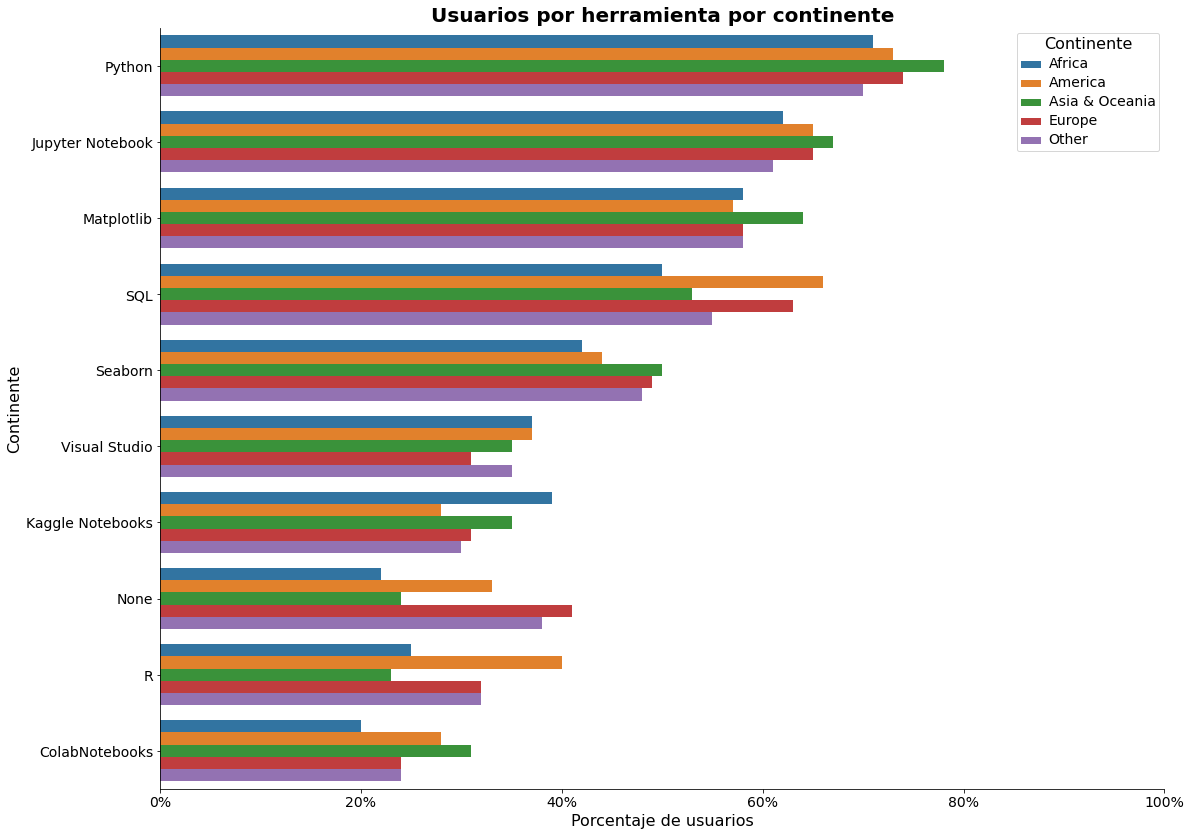

In [ ]:
# creamos un barplot de las herramientas usadas por continente

plt.figure(figsize =(18,14))

fig = sns.barplot(y='Herramientas', x = 'Porcentaje', data = df_cont, hue='Continente')

fig.set_title('Usuarios por herramienta por continente', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Porcentaje de usuarios", fontsize = 16)
fig.set_ylabel (ylabel = "Continente", fontsize = 16)

fig.set(xticks = [0, 20, 40, 60, 80, 100])
fig.set_xticklabels(labels = ['0%', '20%', '40%', '60%', '80%', '100%'], size=14)
fig.set_yticklabels(labels = fig.get_yticklabels(), size=14)

plt.setp(fig.get_legend().get_texts(), fontsize='14')
plt.setp(fig.get_legend().get_title(), fontsize='16')

plt.show()

## Grafica de herramientas mas usadas en Europa

In [25]:
# creamos un dataframe de los datos de Europa

df_eu = df[df['continent'] == 'Europe']

In [ ]:
df_eu.shape

(413, 132)

In [26]:
df_tools_eu = df_eu.drop(columns = ['activities_data_infrastructure', 
                            'activities_ML_prototypes', 
                            'activities_ML_research', 
                            'activities_Other', 
                            'activities_improve_ML', 
                            'activities_analyze_data', 
                            'activities_run_ML', 
                            'activities_None',], axis = 1)

In [27]:
# calculamos el numero total de respuestas por herramienta

df_eu.shape[0] - df_tools_eu.iloc[:,12:19].isnull().sum()

dev_language     393
IDE              393
big_data         211
BI_tools         209
visualisation    385
notebooks        392
sharing          204
dtype: int64

In [28]:
# creamos un diccionario de los totales

diccionario_eu_totals = {'dev_language_Python': 393,
                    'IDE_Jupyter Notebook': 393,
                    'visualisation_Matplotlib': 385,
                    'dev_language_SQL': 393,
                    'visualisation_Seaborn': 385,
                    'IDE_Visual Studio': 393,
                    'notebooks_KaggleNotebooks': 392,
                    'notebooks_None': 392,
                    'dev_language_R': 393,
                    'notebooks_ColabNotebooks': 392,
                    'IDE_Visual Studio Code (VSCode)': 393,
                    'visualisation_Ggplot / ggplot2': 385,
                    'IDE_RStudio': 393,
                    'visualisation_Plotly / Plotly Express': 385,
                    'BI_tools_Tableau': 209,
                    'sharing_GitHub': 204,
                    'IDE_PyCharm': 393,
                    'big_data_MySQL': 211,
                    'BI_tools_Microsoft Power BI': 209,
                    'IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc)': 393,
                    'IDE_Visual Studio Code (VSCode)':393,
                    'IDE_Notepad++':393,
                    'sharing_does_not_share':204}

In [29]:
# creamos un dataframe de las sumas de respuestas por herramienta en Europa

df_sum_tools_eu = df_tools_eu.select_dtypes(include=np.number).sum().reset_index()
df_sum_tools_eu.columns = ['Herramienta', 'Número de usuarios']
df_sum_tools_eu = df_sum_tools_eu.sort_values(by='Número de usuarios', ascending=False).head(20)
df_sum_tools_eu

,Herramienta,Número de usuarios
36,dev_language_Python,304.0
45,IDE_Jupyter Notebook,270.0
28,dev_language_SQL,260.0
54,visualisation_Matplotlib,239.0
58,visualisation_Seaborn,204.0
15,notebooks_None,169.0
31,dev_language_R,134.0
0,notebooks_KaggleNotebooks,127.0
48,IDE_Visual Studio,126.0
59,visualisation_Ggplot / ggplot2,124.0


In [30]:
# añadimos columnas de los totales y porcentajes de respuestas por categoría

df_sum_tools_eu['Total de respuestas'] = df_sum_tools_eu['Herramienta'].map(diccionario_eu_totals)
df_sum_tools_eu['Porcentaje'] = round((df_sum_tools_eu['Número de usuarios'] / df_sum_tools_eu['Total de respuestas'] * 100), 0)
df_sum_tools_eu

,Herramienta,Número de usuarios,Total de respuestas,Porcentaje
36,dev_language_Python,304.0,393,77.0
45,IDE_Jupyter Notebook,270.0,393,69.0
28,dev_language_SQL,260.0,393,66.0
54,visualisation_Matplotlib,239.0,385,62.0
58,visualisation_Seaborn,204.0,385,53.0
15,notebooks_None,169.0,392,43.0
31,dev_language_R,134.0,393,34.0
0,notebooks_KaggleNotebooks,127.0,392,32.0
48,IDE_Visual Studio,126.0,393,32.0
59,visualisation_Ggplot / ggplot2,124.0,385,32.0


In [31]:
# cambiamos los nombres de las herramientas segun el mapa

df_sum_tools_eu['Herramienta'] = df_sum_tools_eu['Herramienta'].map(diccionario_tools)
df_sum_tools_eu = df_sum_tools_eu.sort_values(by='Número de usuarios', ascending=False)
df_sum_tools_eu

,Herramienta,Número de usuarios,Total de respuestas,Porcentaje
36,Python,304.0,393,77.0
45,Jupyter Notebook,270.0,393,69.0
28,SQL,260.0,393,66.0
54,Matplotlib,239.0,385,62.0
58,Seaborn,204.0,385,53.0
15,Does not use notebooks,169.0,392,43.0
31,R,134.0,393,34.0
0,Kaggle Notebooks,127.0,392,32.0
48,Visual Studio,126.0,393,32.0
59,Ggplot / ggplot2,124.0,385,32.0


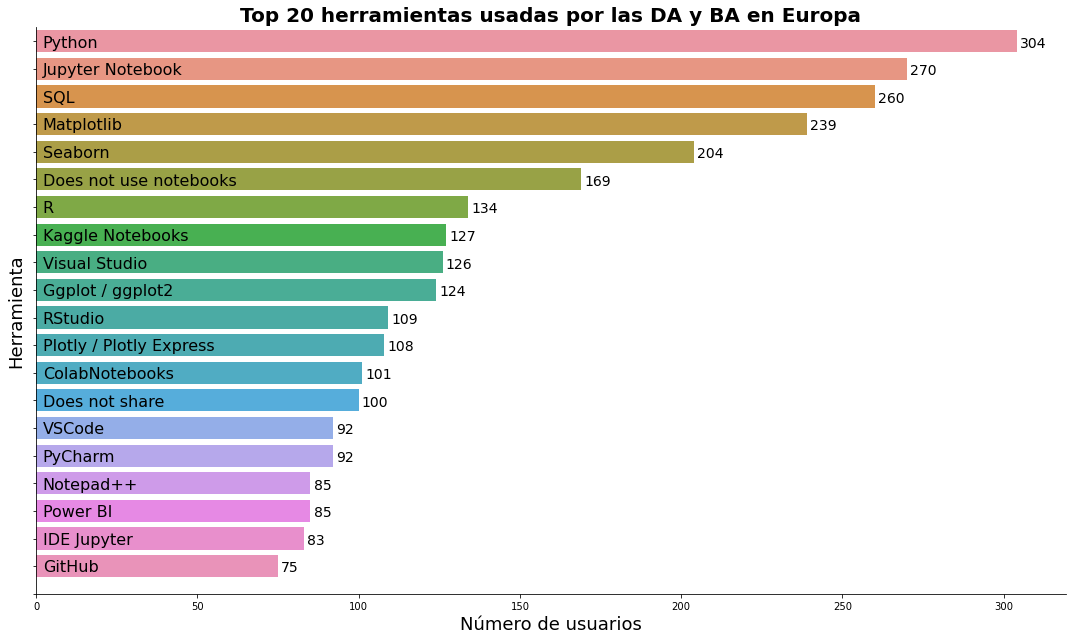

In [32]:
# creamos un barplot de las top 20 herramientas en Europa

plt.figure(figsize=(15, 9))

fig=sns.barplot(y = 'Herramienta', x = 'Número de usuarios', data=df_sum_tools_eu, order= df_sum_tools_eu.sort_values('Número de usuarios', ascending= False)['Herramienta'])

fig.set_title('Top 20 herramientas usadas por las DA y BA en Europa', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_sum_tools_eu["Herramienta"]):
     plt.text(2, indice+0.2, valor,
              horizontalalignment='left', # para colocarlo en el centro de la barra
              fontsize= 16) 

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_sum_tools_eu["Número de usuarios"]):
    plt.text(valor+1, indice+0.2, int(valor),
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 14) 

fig.set_xlabel (xlabel = "Número de usuarios", fontsize = 18)
fig.set_ylabel (ylabel = "Herramienta", fontsize = 18)

#fig.set(xticks = [0, 20, 40, 60, 80, 100])
#fig.set_xticklabels(labels = ['0%', '20%', '40%', '60%', '80%', '100%'], size=14)
fig.set(yticks = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
fig.set_yticklabels(labels = [])

plt.tight_layout()

plt.show()

## Grafica de las herramientas BI

In [ ]:
# creamos una copia del dataframe original

df_BI = df.copy()

In [ ]:
# aplicamos el método explode para poder sacar una tabla de sidetable de la columna de herramientas BI

df_BI['BI_tools'] = df_BI['BI_tools'].apply(lambda x: x.split(',') if type(x) == str else x)
df_BI = df_BI.explode('BI_tools')
df_BI.head(6)

,age,gender,country,continent,job_title,work_activities,size_DA_dept,dept size,years_programming,programming_experience,primary_data_tool,first_language_rec,dev_language,IDE,big_data,BI_tools,visualisation,notebooks,sharing,ML,ML_experience,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Java,dev_language_C,dev_language_Other,dev_language_R,dev_language_Julia,dev_language_C++,dev_language_MATLAB,dev_language_Swift,dev_language_Bash,dev_language_Javascript,dev_language_None,dev_language_Python,dev_language_SQL,IDE_MATLAB,IDE_RStudio,IDE_Other,IDE_None,IDE_Spyder,IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),IDE_Notepad++,IDE_PyCharm,IDE_Vim / Emacs,IDE_Visual Studio Code (VSCode),IDE_Sublime Text,IDE_Jupyter Notebook,visualisation_Altair,visualisation_Ggplot / ggplot2,visualisation_Plotly / Plotly Express,visualisation_Leaflet / Folium,visualisation_Other,visualisation_Shiny,visualisation_Bokeh,visualisation_D3 js,visualisation_Matplotlib,visualisation_Geoplotlib,visualisation_None,visualisation_Seaborn,activities_Other,activities_improve_ML,activities_run_ML,activities_ML_research,activities_None,activities_data_infrastructure,activities_analyze_data,activities_ML_prototypes,big_data_Other,big_data_Google Cloud SQL,big_data_MongoDB,big_data_Microsoft SQL Server,big_data_Microsoft Azure Cosmos DB,big_data_Amazon Redshift,big_data_MySQL,big_data_Amazon RDS,big_data_Snowflake,big_data_Microsoft Azure SQL Database,big_data_Google Cloud Firestore,big_data_Google Cloud BigTable,big_data_Google Cloud BigQuery,big_data_IBM Db2,big_data_Google Cloud Spanner,big_data_Oracle Database,big_data_None,big_data_SQLite,big_data_Amazon DynamoDB,big_data_PostgreSQL,big_data_Amazon Aurora,BI_tools_TIBCO Spotfire,BI_tools_Alteryx,BI_tools_Thoughtspot,BI_tools_Other,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Microsoft Power BI,BI_tools_Domo,BI_tools_SAP Analytics Cloud,BI_tools_Tableau,BI_tools_Tableau CRM,BI_tools_Looker,BI_tools_Google Data Studio,BI_tools_Microsoft Azure Synapse,BI_tools_Qlik,BI_tools_None,BI_tools_Amazon QuickSight
16,50-59,Man,Belgium,Europe,Data Analyst,Analyze and understand data to influence produ...,5-9,medium,20+ years,Senior,"Local development environments (RStudio, Jupyt...",Python,"Python, SQL","Jupyter (JupyterLab; Jupyter Notebooks; etc) ,...",NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express","Kaggle Notebooks,Colab Notebooks, Databricks ...",NaN,1-2 years,< 2 years,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,18-29,Nonbinary,United States of America,America,Data Analyst,NaN,3-4,small,< 1 years,Junior,NaN,R,R,RStudio,NaN,NaN,Ggplot / ggplot2,Google Cloud Datalab,NaN,I do not use machine learning methods,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,

In [ ]:
# creamos la tabla de frequencias con sidetable

df_BI_freq = df_BI.stb.freq(['BI_tools'], thresh= 85)
df_BI_freq['percent'] = round(df_BI_freq['percent'], 0)
df_BI_freq

,BI_tools,count,percent,cumulative_count,cumulative_percent
0,Tableau,701,26.0,701,26.137211
1,Microsoft Power BI,673,25.0,1374,51.230425
2,None,395,15.0,1769,65.958240
3,Google Data Studio,217,8.0,1986,74.049217
4,Qlik,118,4.0,2104,78.448919
5,Tableau CRM,107,4.0,2211,82.438479
6,others,471,18.0,2682,100.000000


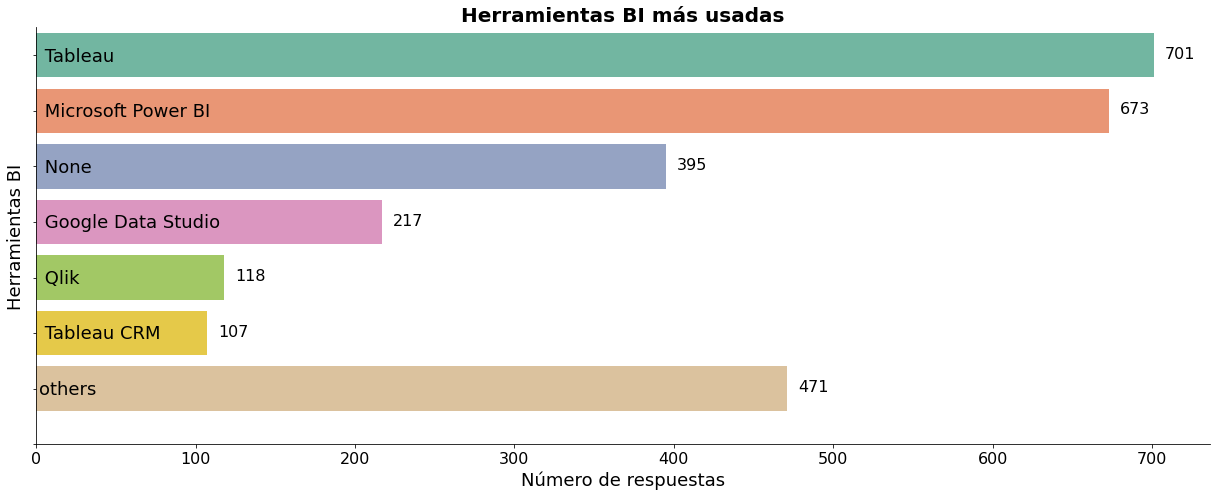

In [ ]:
# creamos un barplotd de las herramientas BI más usadas

plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'BI_tools', x= "count", data=df_BI_freq, palette='Set2')

fig.set_title('Herramientas BI más usadas', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Número de respuestas", fontsize = 18)
fig.set_ylabel (ylabel = "Herramientas BI", fontsize = 18)

fig.set(xticks = [0, 100, 200, 300, 400, 500, 600, 700])
fig.set(yticks = [0, 1, 2, 3, 4, 5, 6, 7])
fig.set_xticklabels(labels = [0, 100, 200, 300, 400, 500, 600, 700], size=16)
fig.set_yticklabels(labels = [], size=16)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_BI_freq["BI_tools"]):
     plt.text(2, indice+0.1, valor,
              horizontalalignment='left', # para colocarlo en el centro de la barra
              fontsize= 18) 

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_BI_freq["count"]):
    plt.text(valor+7, indice+0.05, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 16) 

plt.tight_layout()

plt.show()

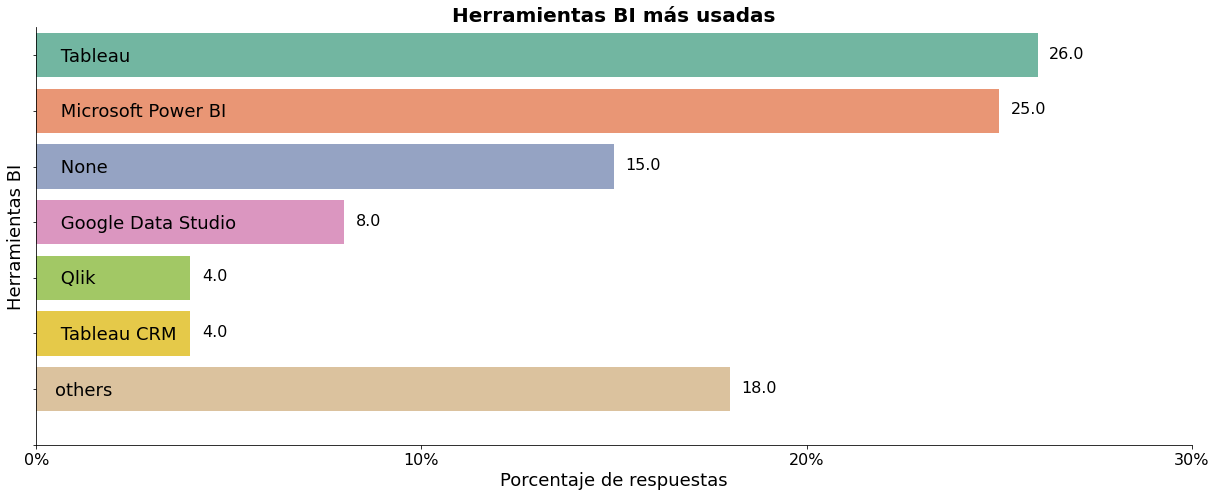

In [ ]:
# creamos la misma gráfica pero de los porcentajes de respuestas

plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'BI_tools', x= "percent", data=df_BI_freq, palette='Set2')

fig.set_title('Herramientas BI más usadas', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Porcentaje de respuestas", fontsize = 18)
fig.set_ylabel (ylabel = "Herramientas BI", fontsize = 18)

fig.set(xticks = [0, 10, 20, 30])
fig.set(yticks = [0, 1, 2, 3, 4, 5, 6, 7])
fig.set_xticklabels(labels = ['0%', '10%', '20%', '30%'], size=16)
fig.set_yticklabels(labels = [], size=16)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_BI_freq["BI_tools"]):
     plt.text(0.5, indice+0.1, valor,
              horizontalalignment='left', # para colocarlo en el centro de la barra
              fontsize= 18) 

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_BI_freq["percent"]):
    plt.text(valor+0.3, indice+0.05, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 16) 

plt.tight_layout()

plt.show()

# Grafica de las herramientas BI mas usadas en Europa

In [ ]:
# seguimos los mismos pasos para Europa

df_BI_eu = df_eu.copy()

In [ ]:
df_BI_eu['BI_tools'] = df_BI_eu['BI_tools'].apply(lambda x: x.split(',') if type(x) == str else x)
df_BI_eu = df_BI_eu.explode('BI_tools')
df_BI_eu.head(6)

,age,gender,country,continent,job_title,work_activities,size_DA_dept,dept size,years_programming,programming_experience,primary_data_tool,first_language_rec,dev_language,IDE,big_data,BI_tools,visualisation,notebooks,sharing,ML,ML_experience,notebooks_KaggleNotebooks,notebooks_ColabNotebooks,notebooks_AzureNotebooks,notebooks_Paperspace/Gradient,notebooks_Binder/JupyterHub,notebooks_CodeOcean,notebooks_IBMWatsonStudio,notebooks_AmazonSagemakerStudioNotebooks,notebooks_AmazonEMRNotebooks,notebooks_GoogleCloudNotebooks(AIPlatform/VertexAI),notebooks_GoogleCloudDatalab,notebooks_DatabricksCollaborativeNotebooks,notebooks_Zeppelin/ZeplNotebooks,notebooks_DeepnoteNotebooks,notebooks_ObservableNotebooks,notebooks_None,notebooks_Other,sharing_PlotlyDash,sharing_Streamlit,sharing_NBViewer,sharing_GitHub,sharing_Personalblog,sharing_Kaggle,sharing_Colab,sharing_Shiny,sharing_does_not_share,sharing_Other,dev_language_Java,dev_language_C,dev_language_Other,dev_language_R,dev_language_Julia,dev_language_C++,dev_language_MATLAB,dev_language_Swift,dev_language_Bash,dev_language_Javascript,dev_language_None,dev_language_Python,dev_language_SQL,IDE_MATLAB,IDE_RStudio,IDE_Other,IDE_None,IDE_Spyder,IDE_Visual Studio,IDE_Jupyter (JupyterLab; Jupyter Notebooks; etc),IDE_Notepad++,IDE_PyCharm,IDE_Vim / Emacs,IDE_Visual Studio Code (VSCode),IDE_Sublime Text,IDE_Jupyter Notebook,visualisation_Altair,visualisation_Ggplot / ggplot2,visualisation_Plotly / Plotly Express,visualisation_Leaflet / Folium,visualisation_Other,visualisation_Shiny,visualisation_Bokeh,visualisation_D3 js,visualisation_Matplotlib,visualisation_Geoplotlib,visualisation_None,visualisation_Seaborn,activities_Other,activities_improve_ML,activities_run_ML,activities_ML_research,activities_None,activities_data_infrastructure,activities_analyze_data,activities_ML_prototypes,big_data_Other,big_data_Google Cloud SQL,big_data_MongoDB,big_data_Microsoft SQL Server,big_data_Microsoft Azure Cosmos DB,big_data_Amazon Redshift,big_data_MySQL,big_data_Amazon RDS,big_data_Snowflake,big_data_Microsoft Azure SQL Database,big_data_Google Cloud Firestore,big_data_Google Cloud BigTable,big_data_Google Cloud BigQuery,big_data_IBM Db2,big_data_Google Cloud Spanner,big_data_Oracle Database,big_data_None,big_data_SQLite,big_data_Amazon DynamoDB,big_data_PostgreSQL,big_data_Amazon Aurora,BI_tools_TIBCO Spotfire,BI_tools_Alteryx,BI_tools_Thoughtspot,BI_tools_Other,BI_tools_Sisense,BI_tools_Salesforce,BI_tools_Microsoft Power BI,BI_tools_Domo,BI_tools_SAP Analytics Cloud,BI_tools_Tableau,BI_tools_Tableau CRM,BI_tools_Looker,BI_tools_Google Data Studio,BI_tools_Microsoft Azure Synapse,BI_tools_Qlik,BI_tools_None,BI_tools_Amazon QuickSight
16,50-59,Man,Belgium,Europe,Data Analyst,Analyze and understand data to influence produ...,5-9,medium,20+ years,Senior,"Local development environments (RStudio, Jupyt...",Python,"Python, SQL","Jupyter (JupyterLab; Jupyter Notebooks; etc) ,...",NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express","Kaggle Notebooks,Colab Notebooks, Databricks ...",NaN,1-2 years,< 2 years,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,40-49,Man,Austria,Europe,Business Analyst,Analyze and understand data to influence produ...,3-4,small,5-10 years,Senior,"Local development environments (RStudio, Jupyt...",SQL,"Python, SQL, Javascript","Jupyter (JupyterLab; Jupyter Notebooks; etc) ,...","MySQL , PostgreSQL , SQLite , Oracle Database ...",Google Data Studio,"Matplotlib ,Seaborn ,Plotly / Plotly Express ...","Kaggle Notebooks, IBM Watson Studio , Amazon ...","Plotly Dash , Streamlit , GitHub",< 1 year,< 

In [ ]:
df_BI_eu_freq = df_BI_eu.stb.freq(['BI_tools'], thresh= 83)
df_BI_eu_freq['percent'] = round(df_BI_eu_freq['percent'], 0)
df_BI_eu_freq

,BI_tools,count,percent,cumulative_count,cumulative_percent
0,Microsoft Power BI,85,27.0,85,27.156550
1,Tableau,65,21.0,150,47.923323
2,None,51,16.0,201,64.217252
3,Google Data Studio,26,8.0,227,72.523962
4,Qlik,25,8.0,252,80.511182
5,others,61,19.0,313,100.000000


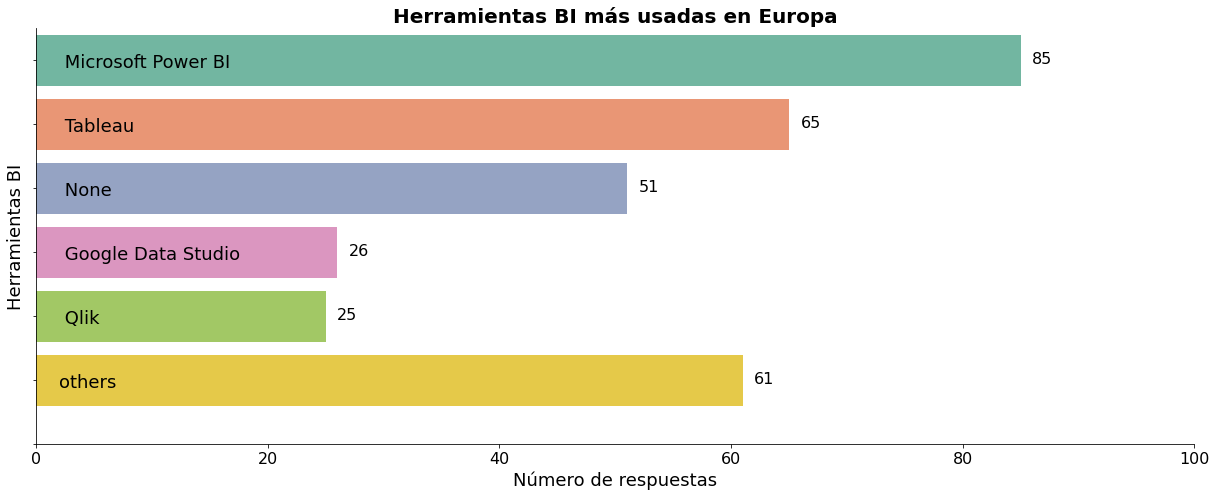

In [ ]:
plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'BI_tools', x= "count", data=df_BI_eu_freq, palette='Set2')

fig.set_title('Herramientas BI más usadas en Europa', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Número de respuestas", fontsize = 18)
fig.set_ylabel (ylabel = "Herramientas BI", fontsize = 18)

fig.set(xticks = [0, 20, 40, 60, 80, 100])
fig.set(yticks = [0, 1, 2, 3, 4, 5, 6])
fig.set_xticklabels(labels = [0, 20, 40, 60, 80, 100], size=16)
fig.set_yticklabels(labels = [], size=16)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_BI_eu_freq["BI_tools"]):
     plt.text(2, indice+0.1, valor,
              horizontalalignment='left', # para colocarlo en el centro de la barra
              fontsize= 18) 

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_BI_eu_freq["count"]):
    plt.text(valor+1, indice+0.05, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 16) 

plt.tight_layout()

plt.show()

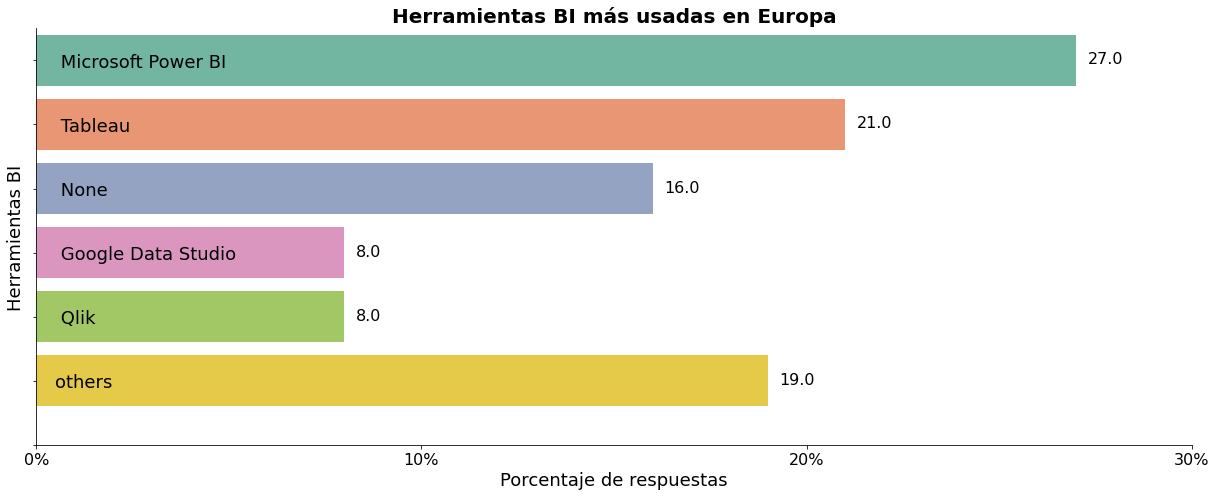

In [ ]:
plt.figure(figsize=(17, 7))

fig=sns.barplot(y = 'BI_tools', x= "percent", data=df_BI_eu_freq, palette='Set2')

fig.set_title('Herramientas BI más usadas en Europa', fontsize = 20, fontweight = 'bold') 

fig.spines[["top", "right"]].set_visible(False)

fig.set_xlabel (xlabel = "Porcentaje de respuestas", fontsize = 18)
fig.set_ylabel (ylabel = "Herramientas BI", fontsize = 18)

fig.set(xticks = [0, 10, 20, 30])
fig.set(yticks = [0, 1, 2, 3, 4, 5, 6])
fig.set_xticklabels(labels = ['0%', '10%', '20%', '30%'], size=16)
fig.set_yticklabels(labels = [], size=16)

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_BI_eu_freq["BI_tools"]):
     plt.text(0.5, indice+0.1, valor,
              horizontalalignment='left', # para colocarlo en el centro de la barra
              fontsize= 18) 

# para poner etiquetas encima de las barras
for indice, valor in enumerate(df_BI_eu_freq["percent"]):
    plt.text(valor+0.3, indice+0.05, valor,
             horizontalalignment='left', # para colocarlo en el centro de la barra
             fontsize= 16) 

plt.tight_layout()

plt.show()